Project 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sys
import seaborn as sns

In [2]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

In [3]:
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

In [4]:
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [10]:
df = pd.read_csv('C:/Users/Velmurugan R/Downloads/data_stocks_Project5_csv.csv')
df.head()

,DATE,SP500,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,2363.6101,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,2364.1001,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,2362.6799,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,2364.3101,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,2364.8501,143.6600,102.0600,81.12,33.8400,33.4000


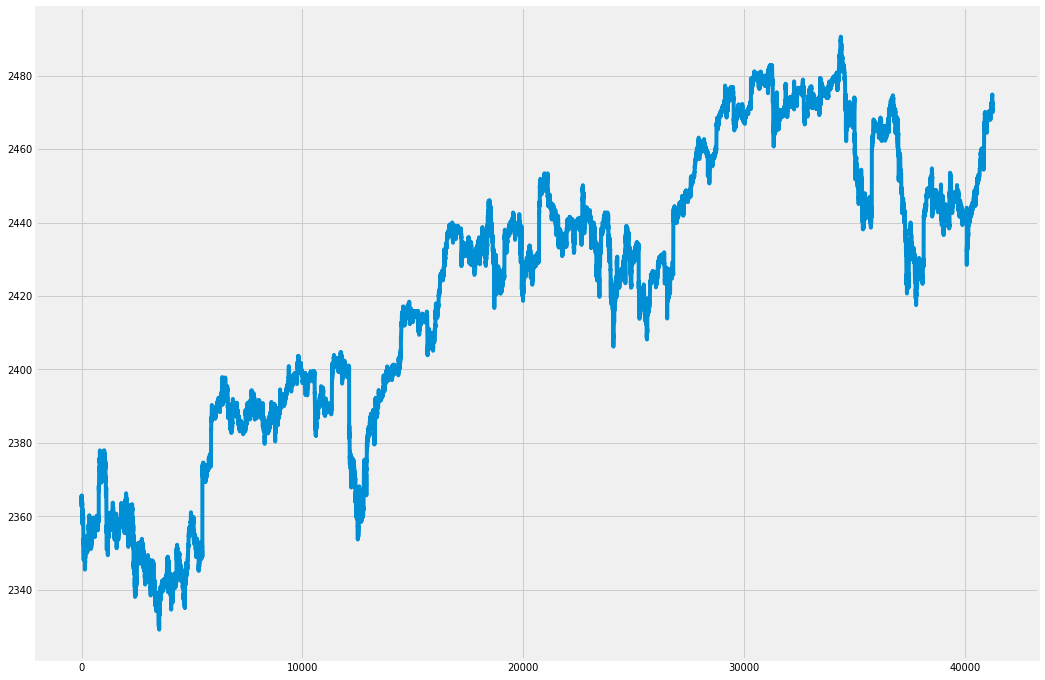

In [11]:
df['SP500'].plot(figsize=(16,12))

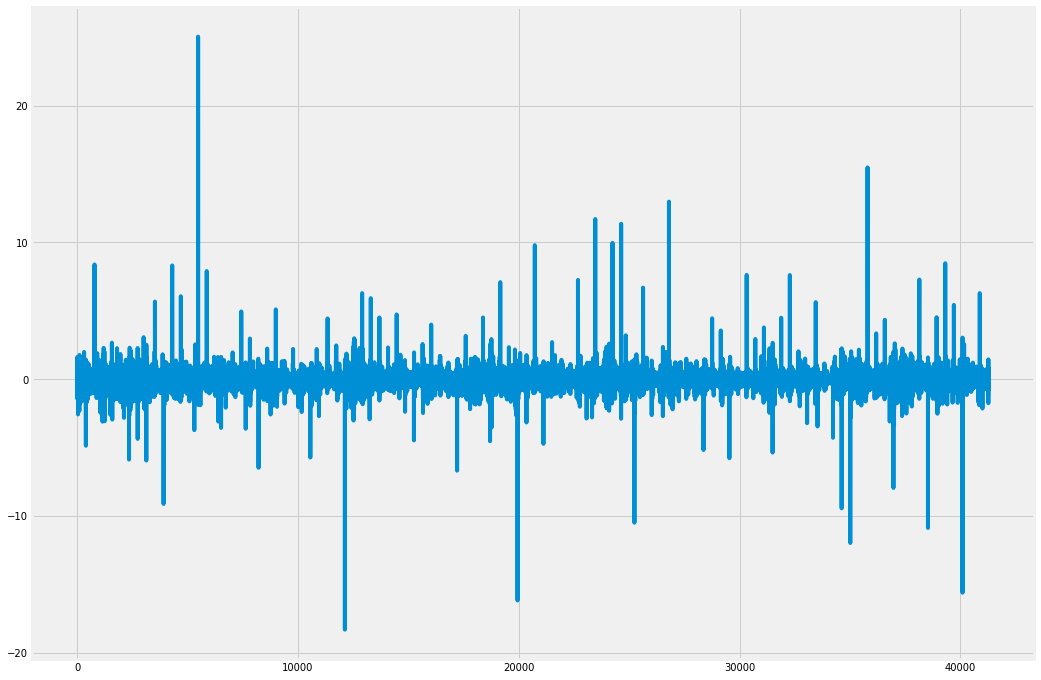

In [12]:
df['First Difference'] = df['SP500'] - df['SP500'].shift()
df['First Difference'].plot(figsize=(16, 12))

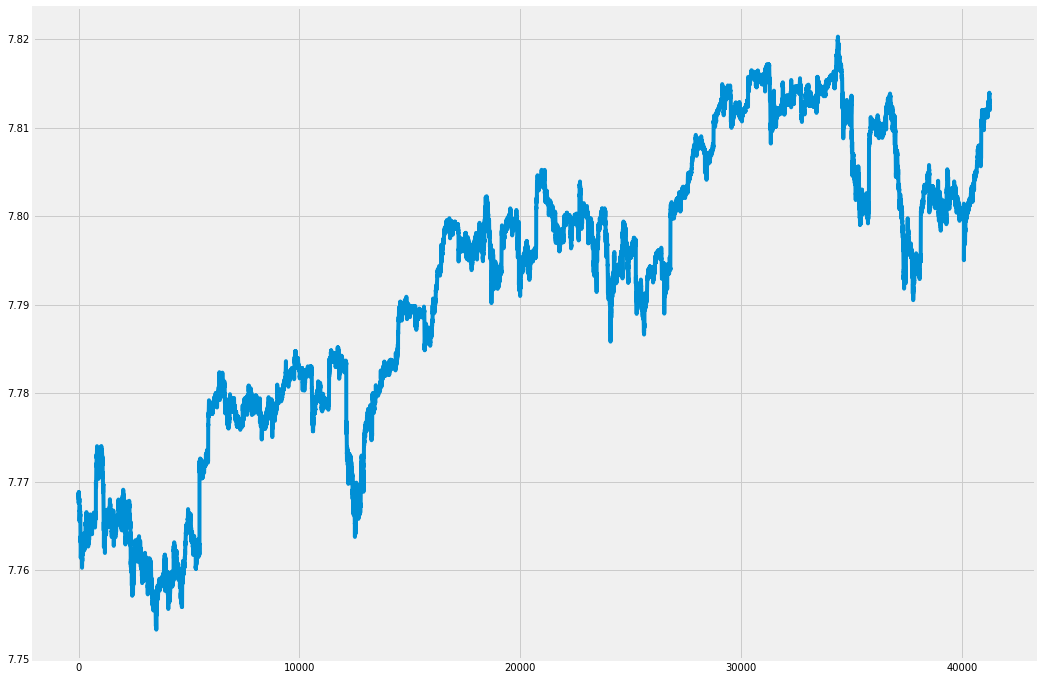

In [13]:
df['Natural Log'] = df['SP500'].apply(lambda x: np.log(x))
df['Natural Log'].plot(figsize=(16, 12))

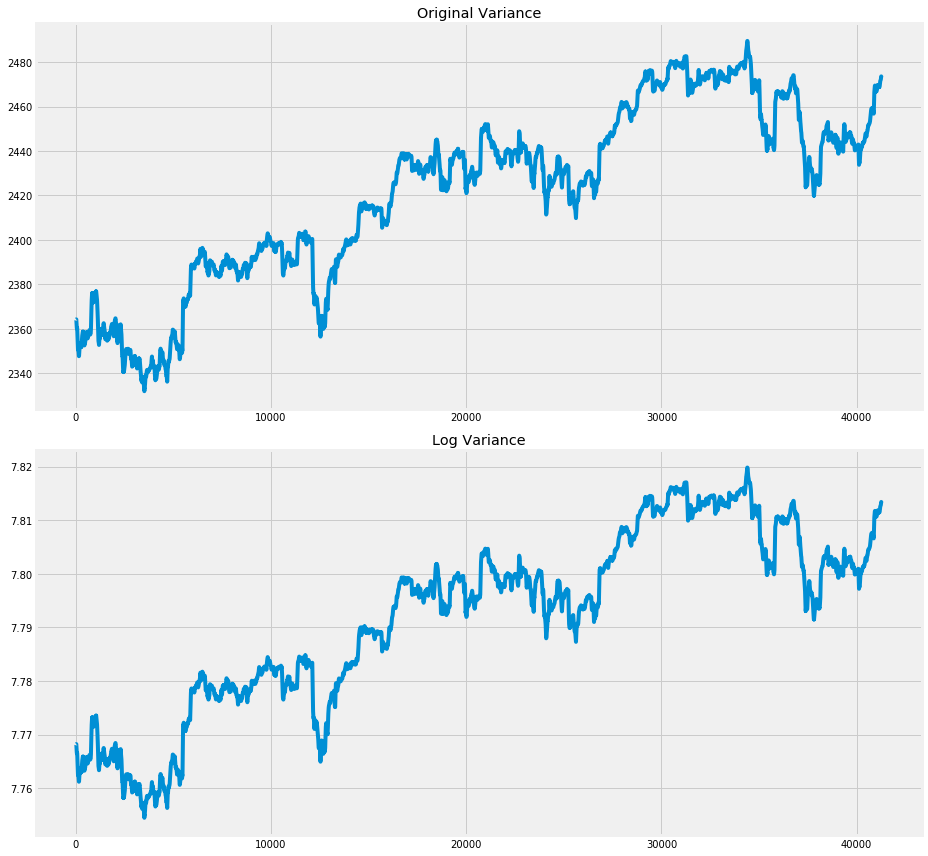

In [16]:
df['Original Variance'] = df['SP500'].rolling(30).mean()
df['Log Variance'] = df['Natural Log'].rolling(30).mean()
fig, ax = plt.subplots(2, 1, figsize=(13, 12))
df['Original Variance'].plot(ax=ax[0], title='Original Variance')
df['Log Variance'].plot(ax=ax[1], title='Log Variance')
fig.tight_layout()

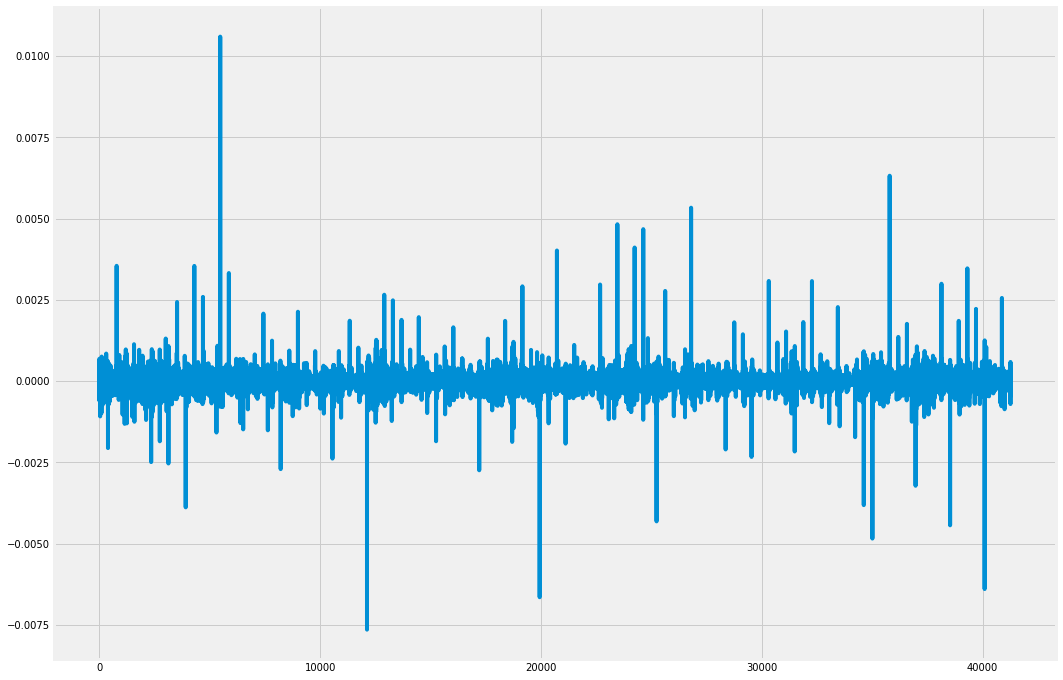

In [17]:
df['Logged First Difference'] = df['Natural Log'] - df['Natural Log'].shift()
df['Logged First Difference'].plot(figsize=(16, 12))

In [18]:
df['Lag 1'] = df['Logged First Difference'].shift()
df['Lag 2'] = df['Logged First Difference'].shift(2)
df['Lag 5'] = df['Logged First Difference'].shift(5)
df['Lag 30'] = df['Logged First Difference'].shift(30)

C:\Users\Velmurugan R\Anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Velmurugan R\Anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


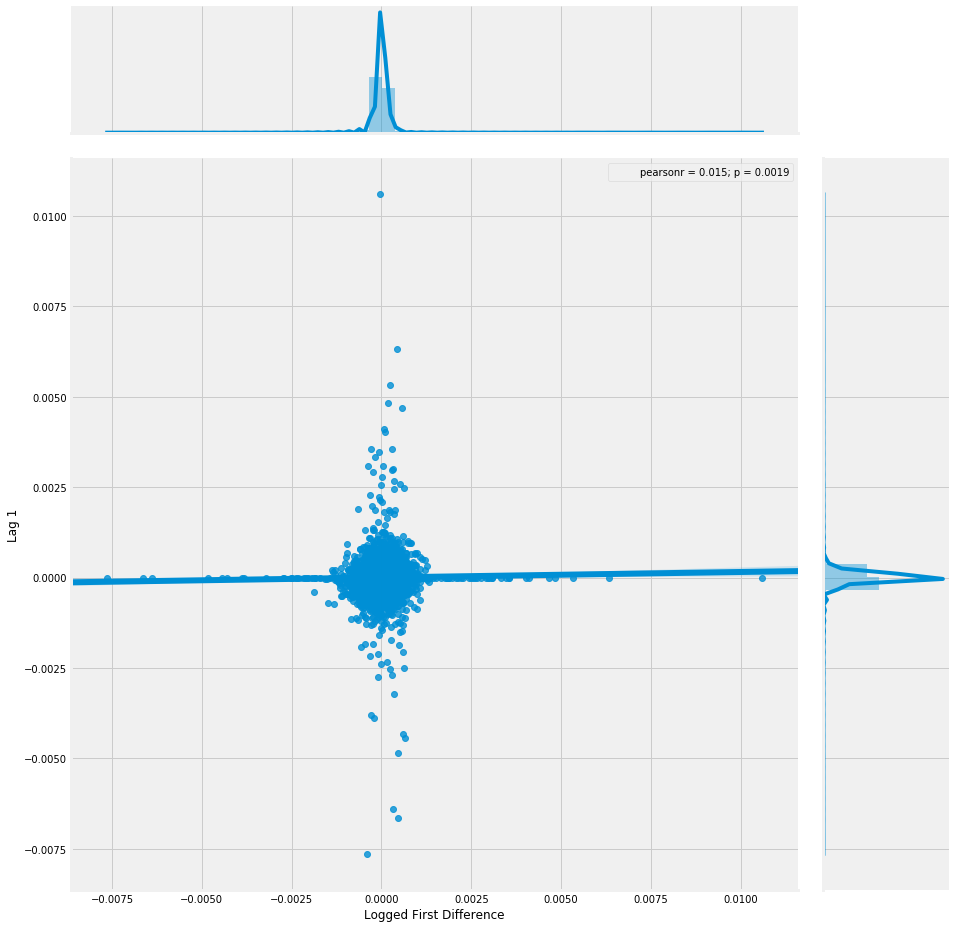

In [20]:
sns.jointplot('Logged First Difference', 'Lag 1', df, kind='reg', size=13)

In [21]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

In [22]:
lag_correlations = acf(df['Logged First Difference'].iloc[1:])
lag_partial_correlations = pacf(df['Logged First Difference'].iloc[1:])

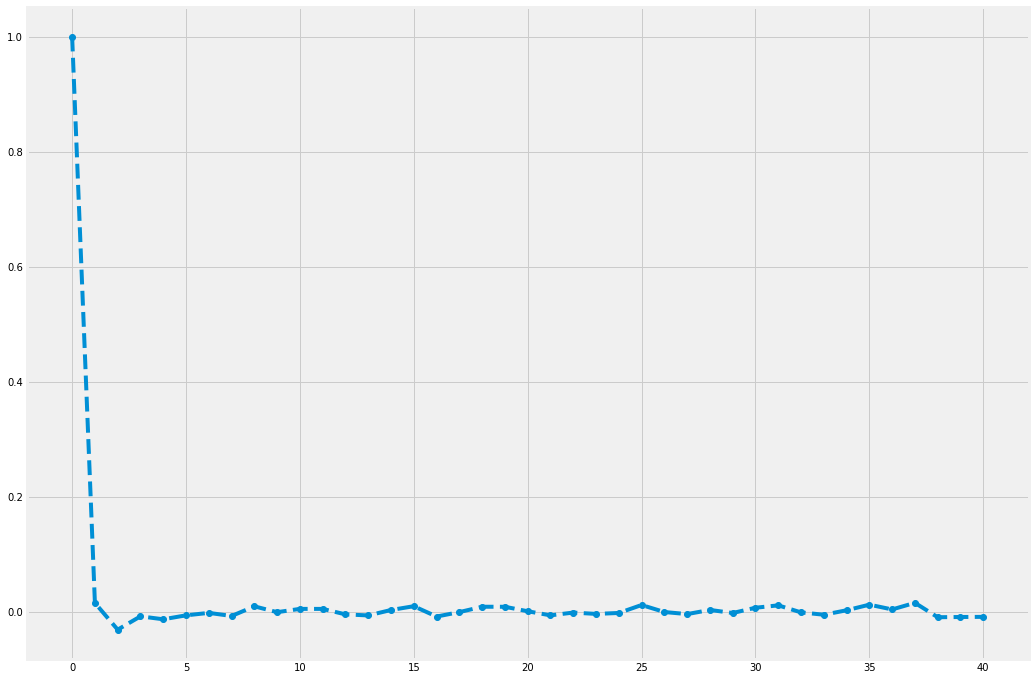

In [23]:
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlations, marker='o', linestyle='--')

In [24]:
import statsmodels.api as sm
df.index = pd.DatetimeIndex(freq='d',start=0,periods=41266)

In [25]:
df.head(5)

,DATE,SP500,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,First Difference,Natural Log,Original Variance,Log Variance,Logged First Difference,Lag 1,Lag 2,Lag 5,Lag 30
1970-01-01,1491226200,2363.6101,143.6800,102.2300,81.03,33.7400,33.3975,NaN,7.767945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,1491226260,2364.1001,143.7000,102.1400,81.21,33.8800,33.3950,0.4900,7.768153,NaN,NaN,0.000207,NaN,NaN,NaN,NaN
1970-01-03,1491226320,2362.6799,143.6901,102.2125,81.21,33.9000,33.4100,-1.4202,7.767552,NaN,NaN,-0.000601,0.000207,NaN,NaN,NaN
1970-01-04,1491226380,2364.3101,143.6400,102.1400,81.13,33.8499,33.3350,1.6302,7.768242,NaN,NaN,0.000690,-0.000601,0.000207,NaN,NaN
1970-01-05,1491226440,2364.8501,143.6600,102.0600,81.12,33.8400,33.4000,0.5400,7.768470,NaN,NaN,0.000228,0.000690,-0.000601,NaN,NaN


<Figure size 2592x2016 with 0 Axes>

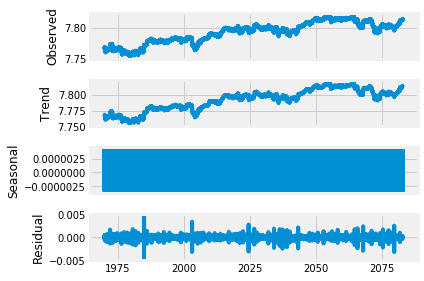

In [28]:
decomposition = sm.tsa.seasonal_decompose(df['Natural Log'])
fig = plt.figure(figsize=(36,28))
fig = decomposition.plot()

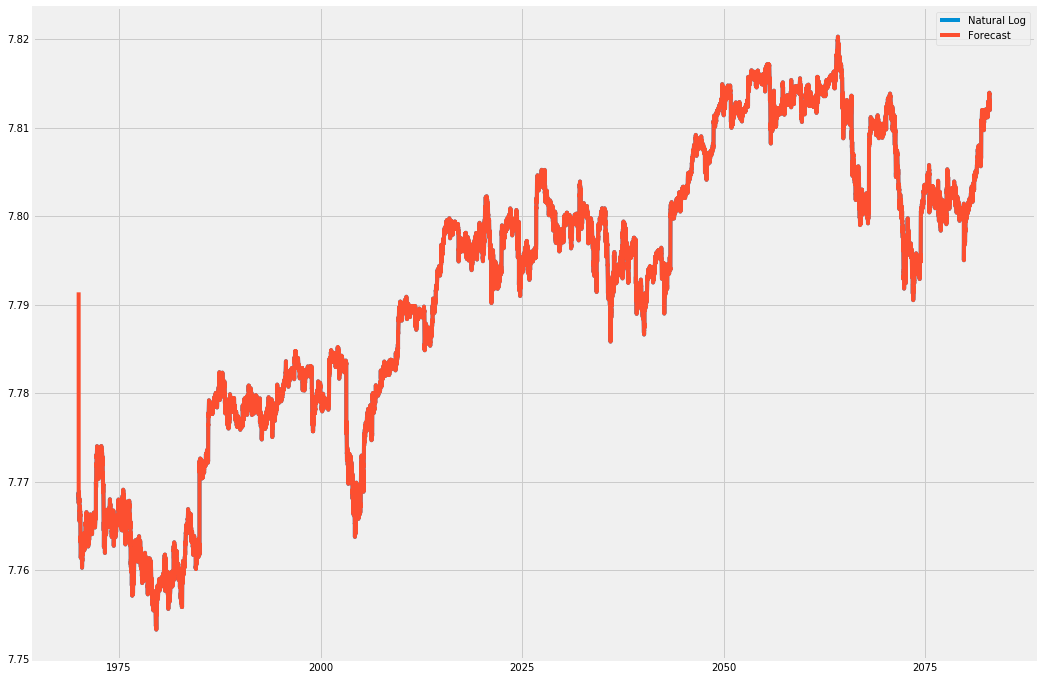

In [29]:
# trying out ARIMA Model
model = sm.tsa.ARIMA(df['Natural Log'].iloc[1:], order=(1, 0, 0))
results = model.fit(disp=-1)
df['Forecast'] = results.fittedvalues
df[['Natural Log', 'Forecast']].plot(figsize=(16, 12))

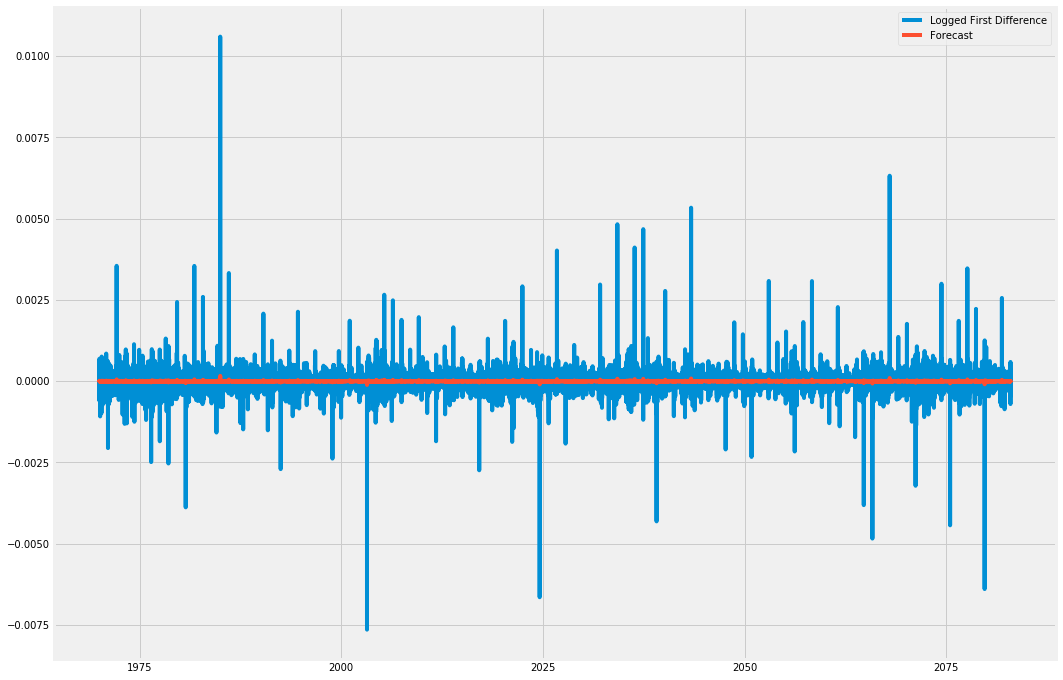

In [30]:
model = sm.tsa.ARIMA(df['Logged First Difference'].iloc[1:], order=(1, 0, 0))
results = model.fit(disp=-1)
df['Forecast'] = results.fittedvalues
df[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))

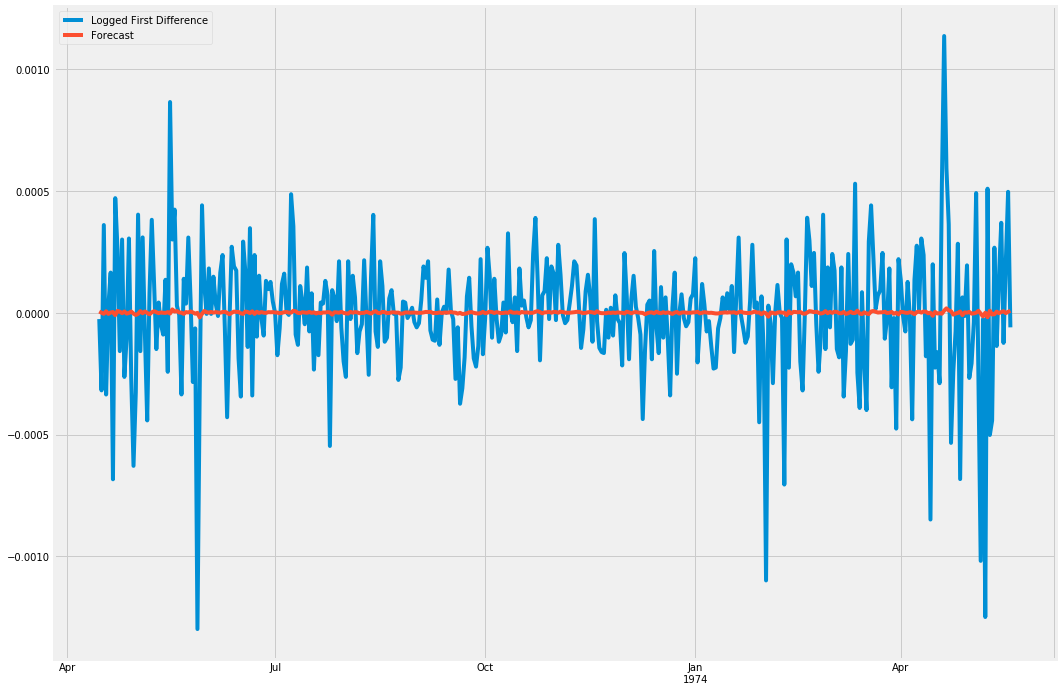

In [31]:
df[['Logged First Difference', 'Forecast']].iloc[1200:1600, :].plot(figsize=(16, 12))

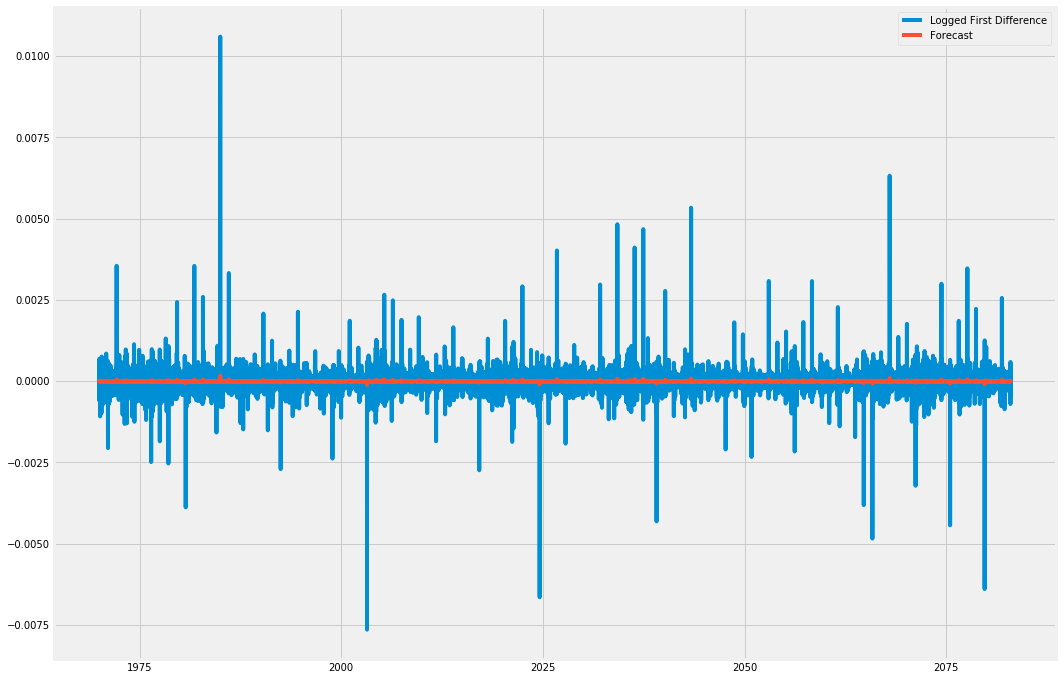

In [32]:
model = sm.tsa.ARIMA(df['Logged First Difference'].iloc[1:], order=(0, 0, 1))
results = model.fit(disp=-1)
df['Forecast'] = results.fittedvalues
df[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))